# Digit Recognizer

My Solution for the problem statement achieved score of **0.99357** and obatained **175th rank** in this kaggle competetion, which is in the top 20% of the submissions.

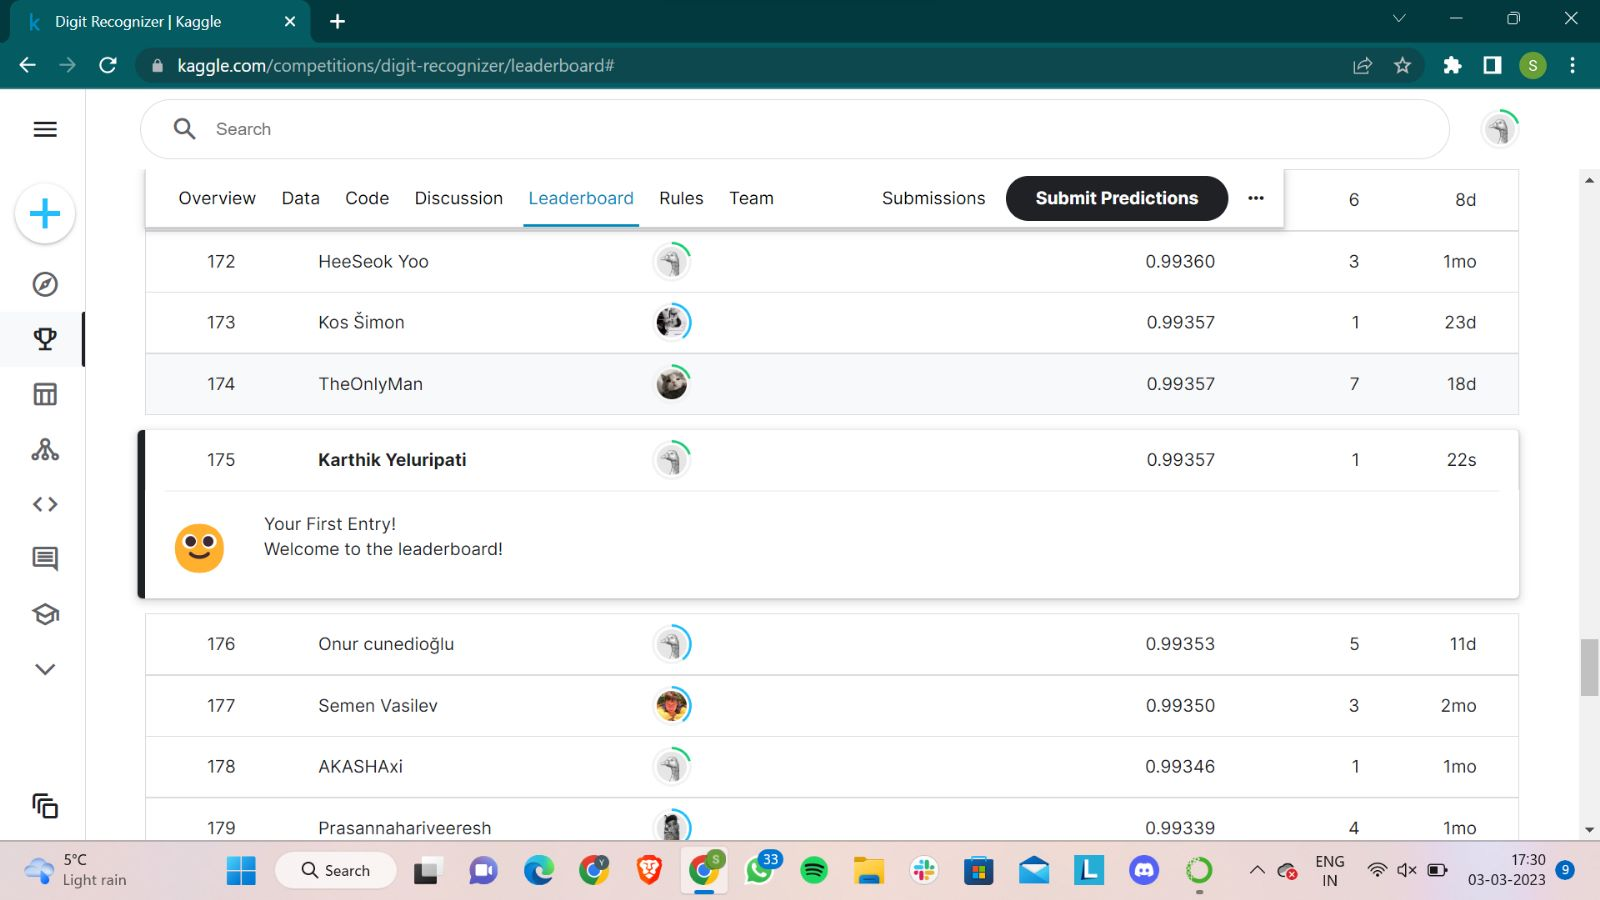

## 1. Import Necessary Libraries:

In [5]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Basic Requiremnts:

In [6]:
#importing packages for Data Visualizaion 
import seaborn as sns # importing seaborn 
import matplotlib.pyplot as plt #importing pyplot
import matplotlib.image as mpimg #importing pyplot
%matplotlib inline

Other Requiremnts for Machine Learning(ML) Algorithms or Models:

In [7]:
try:
  !pip install --upgrade pip
  !pip install xgboost #installing xgboost
  !pip install catboost # installing catboost
  !pip install -U tfx
  !pip install ipython-autotime 
except:
  pass

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#installing'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
from itertools import permutations #importing permutations from itertools
from sklearn.model_selection import train_test_split #importing train_test_ split for spliting datasets
from sklearn.metrics import confusion_matrix #importing Confusion matrix from sklearn

In [9]:
import tensorflow as tf #importing tensorflow
print("Tensorflow version " + tf.__version__) # Printing Tensorflow version
np.random.seed(42) 

Tensorflow version 2.11.0


In [10]:
#from Sample Data collection
from keras.datasets import mnist #importing MNIST dataset

In [11]:
from keras.utils.np_utils import to_categorical #convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator 

from keras.models import Sequential #importing Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout,BatchNormalization
from keras.optimizers import Adam # imporing Adam optimizer

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

## 2 .Load data from that dicretory 

In [12]:
train_data=pd.read_csv("train.csv") #loading the train dataset provided
test_data=pd.read_csv("test.csv") #Loading the test dataset provided

In [13]:
#separate the independent and dependent variables (values of X and Y)
Y_train=train_data['label']
X_train=train_data.drop('label', axis=1) #droping "label" column

In [14]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [15]:
X_train #Check the pixel data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from original data

Using Keras and concatenating as discussied in the class

In [16]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data() #Loading test and train fata from the mnist datasets
#Concatenating training datasets
x_train1 = np.concatenate([x_train0, x_test0], axis=0) 
y_train1 = np.concatenate([y_train0, y_test0], axis=0)

X_train_keras = x_train1.reshape(-1, 28*28) #Reshaping the training dataset
Y_train_keras = y_train1

**Matrix data creations **

In [17]:
X_train = np.concatenate((X_train.values, X_train_keras))
Y_train = np.concatenate((Y_train, Y_train_keras))

In [18]:
X_train 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
Y_train

array([1, 0, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
print(X_train.shape)
print(Y_train.shape)

(112000, 784)
(112000,)


In [21]:
#Statistical summary for test data
print(test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Counting images for every digit
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 11035,
 1: 12561,
 2: 11167,
 3: 11492,
 4: 10896,
 5: 10108,
 6: 11013,
 7: 11694,
 8: 10888,
 9: 11146}

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


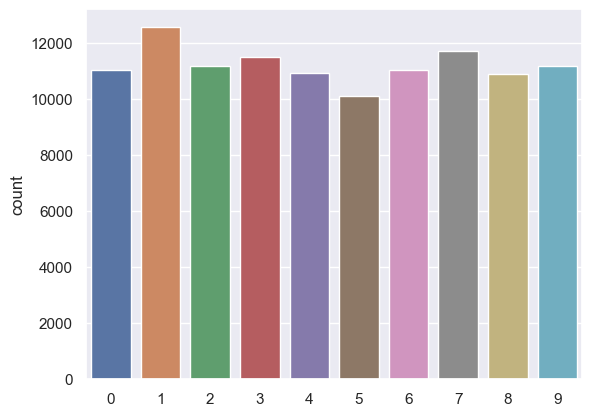

In [23]:
#Bar chart  for Target column
sns.set(context='notebook', style='darkgrid', palette='deep')
g = sns.countplot(Y_train)

In [24]:
#converting values to float
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
test_data=test_data.astype('float32')

# Normalize the data
X_train = X_train / 255.0
test_data = test_data / 255.0

In [25]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [26]:
# Encode labels to one hot vectors
Y_train=to_categorical(Y_train, num_classes=10)

print(f"Label size {Y_train.shape}") #Printing Label size

Label size (112000, 10)


**Split the train and the validation set**

In [27]:
# 70% for training data, 30% for Validation data, 
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.3, random_state=100)

In [28]:
#print the sizes of datasets
print("The size of X_train : {}\nThe size of Y_train : {}\nThe size of X_val   : {}\nThe size of Y_val   : {}\n"
      .format(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape))

The size of X_train : (78400, 28, 28, 1)
The size of Y_train : (78400, 10)
The size of X_val   : (33600, 28, 28, 1)
The size of Y_val   : (33600, 10)



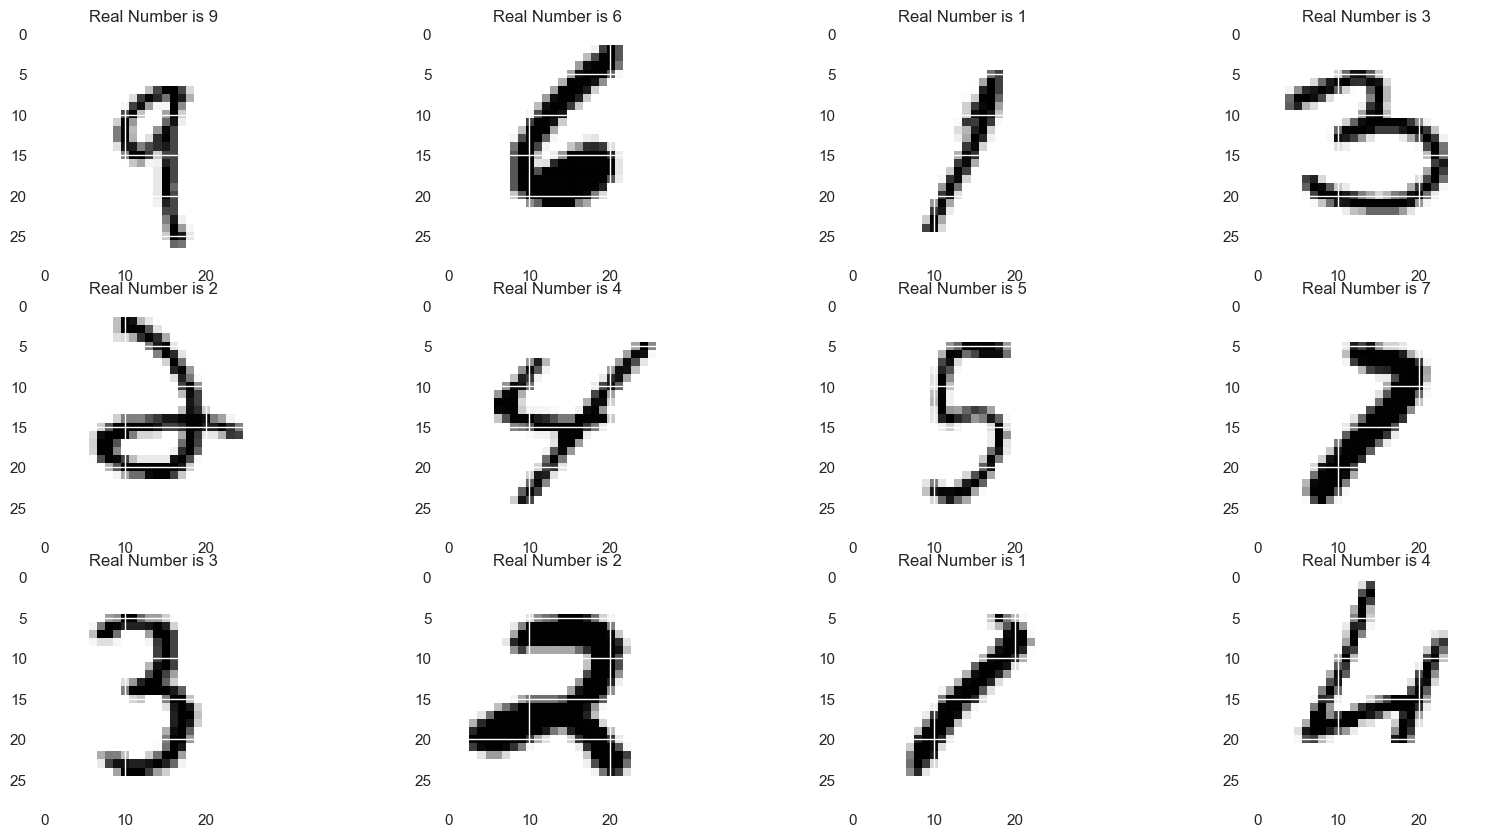

In [29]:
#Conver X_train to shape (num_images, img_rows, img_cols) for plotting 
X_train_temp = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(3, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train_temp[i], cmap='binary')
    digit = Y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## 3. Convolutional Neural Network(CNN) Model define:

Using Sequiential Method as discused in week 1 and week 2 Lecture

In [30]:
model= Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5,5), padding='Same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(BatchNormalization())


model.add(Conv2D(filters=512, kernel_size = (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

**Model Summary;**

Understand the model and the layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0

In [32]:
#Defining the optimizer
optimizer=Adam(lr=0.001,decay=0.0)

C:\Users\karth\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
#Compile the model
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Set a learning rate annealer
learning_rate_redcuing=ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience=5,
                                         verbose=1,
                                         factor=0.5,
                                         min_lr=0.0001)

In [35]:
epochs = 5 # Training the model with 5 epochs
batch_size = 32

In [36]:
#Do data augmentation to prevent overfitting

imagegen=ImageDataGenerator(
                            featurewise_center=False, #set input mean to 0 over the dataset
                            samplewise_center=False, #set each sample mean to 0
                            featurewise_std_normalization=False, #divide inputs by std of the dataset
                            samplewise_std_normalization=False, #divide each input by its std
                            zca_whitening=False, #apply ZCA whitening
                            rotation_range=10, #randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range=0.1, #randomly zoom image 
                            width_shift_range=0.1, #randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1, #randomly shift images vertically (fraction of total height)
                            horizontal_flip=False, #randomly flip images
                            vertical_flip=False)
    
imagegen.fit(X_train)

In [37]:
#Training data (Fit the model)

history=model.fit_generator(imagegen.flow(X_train, Y_train,batch_size=batch_size),
                                         epochs=epochs,
                                         validation_data=(X_val, Y_val),
                                         verbose=1,
                                        steps_per_epoch=X_train.shape[0] // batch_size,
                                        callbacks=[learning_rate_redcuing])

C:\Users\karth\AppData\Local\Temp\ipykernel_26100\2148261911.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(imagegen.flow(X_train, Y_train,batch_size=batch_size),


Epoch 1/5
2450/2450 [==============================] - 862s 350ms/step - loss: 0.1870 - accuracy: 0.9450 - val_loss: 0.0528 - val_accuracy: 0.9834 - lr: 0.0010
Epoch 2/5
2450/2450 [==============================] - 824s 336ms/step - loss: 0.0827 - accuracy: 0.9761 - val_loss: 0.0304 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 3/5
2450/2450 [==============================] - 747s 305ms/step - loss: 0.0684 - accuracy: 0.9820 - val_loss: 0.0383 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 4/5
2450/2450 [==============================] - 716s 292ms/step - loss: 0.0586 - accuracy: 0.9844 - val_loss: 0.0296 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/5
2450/2450 [==============================] - 774s 316ms/step - loss: 0.0496 - accuracy: 0.9870 - val_loss: 0.0295 - val_accuracy: 0.9925 - lr: 0.0010


Saving the best model as discussed in class

In [38]:
#Save Best the model
model.save("Model.h5")
model.save_weights("Model_weights.h5")

1050/1050 [==============================] - 35s 33ms/step


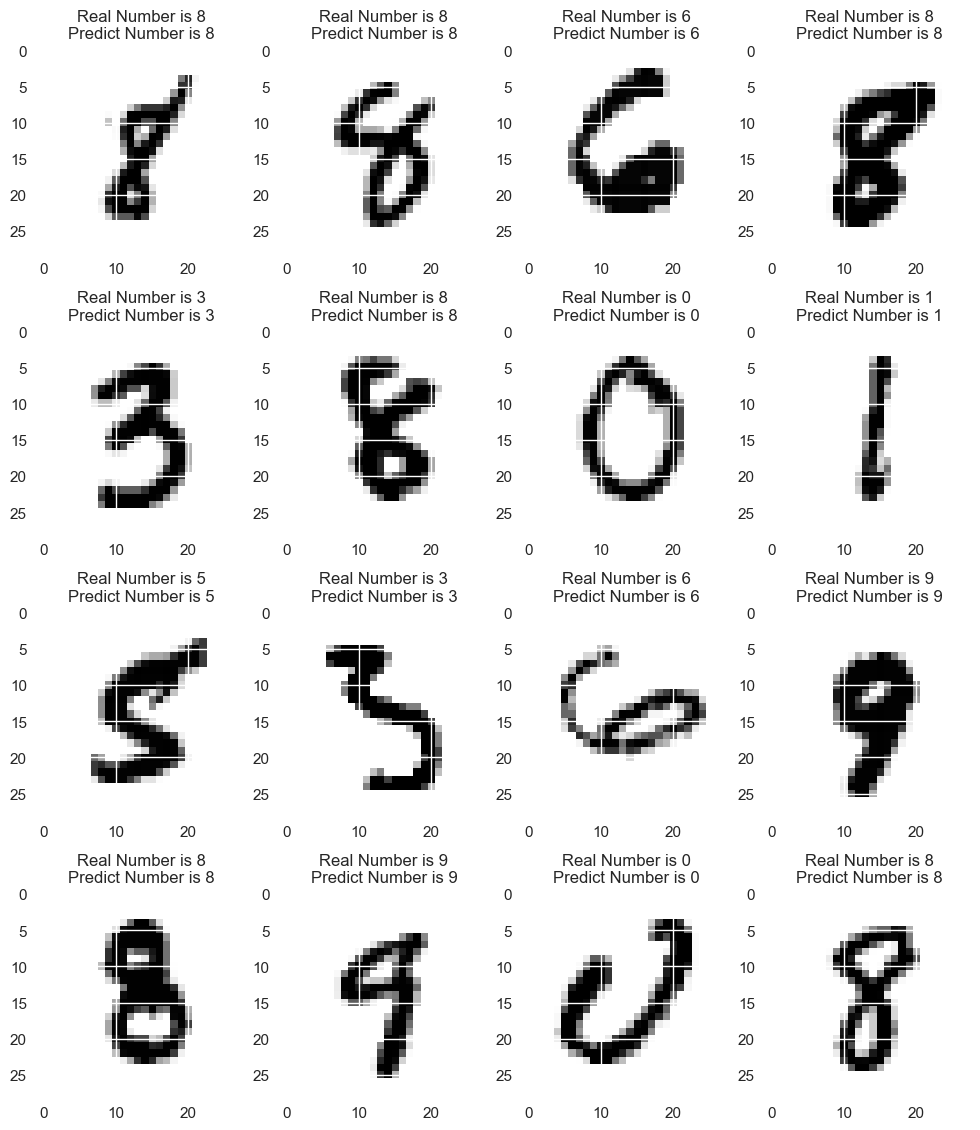

In [39]:
y_pred = model.predict(X_val)

X_test_temp = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))



for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_temp[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [40]:
# Storing the predicted results
results = model.predict(test_data)

# Select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 27s 31ms/step


Obtaing the output submission file , used to submit as the output in kaggle competition

In [41]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


Submitted the above file and obtained the score of **0.99357** and achieved **175th rank** which is in the top 20% of the submissions.